Grupo 0: Rodrigez Emilce y Rodriguez Paula

MACHINE LEARNING

age------------------------Edad del cliente

job------------------------Tipo de empleo del cliente

martial status-------------Estado civil 

education------------------Educacion maxima alcanzada por el cliente

Credit---------------------Si tiene deuda de crédito o no

balance--------------------Promedio de saldo en la cuenta en el anio

housing loan---------------Si tiene seguro de hogar o no

Persona loan---------------Si tiene prestamos o no

contact--------------------tipo con contacto del cliente

Last Contact Day-----------Ultimo dia de contacto con el cliente en el mes

Last Contact Month---------Ultimo mes de contacto con el cliente en el anio

Last Contact Duration------Duracion del ultimo contacto con el cliente medido en segundos

campaign-------------------Cantidad de contactos al cliente durante esta campania, incluye el último contacto.

pdays----------------------Cantidad de dias que pasaron del último contacto con el cliente de una campania anterior.
                            -1 significa que no hubo contacto previo
                            
previous-------------------Cantidad de contactos previos a esta campania para cada cliente

poutcome-------------------Performance de la campania de marketing anterior para este cliente

Subscription---------------Si el cliente accede a la campania o no.



In [1]:
# Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import svm, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [3]:
#Importamos librerias de Feature Selection
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold

In [4]:
# Importamos librerias de PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [77]:
# importamos librearias de Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix, mean_squared_error,accuracy_score, f1_score,classification_report

In [6]:
# Se importo el dataset con Pandas
df = pd.read_csv('bank_subscription_filtrado.csv')
# Se muestra las primeras 5 filas del dataset
df.head()

,Unnamed: 0,Age,Job,Marital_Status,Education,Credit,Balance(euros),Housing_Loan,Personal_Loan,Contact,Last_Contact_Day,Last_Contact_Month,Last_Contact_Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,0,58.000000,management,married,secondary,no,2143.000000,yes,no,unknown,5,may,261.000000,1,-1.0,0,unknown,1
1,1,44.000000,technician,single,secondary,no,29.000000,yes,no,unknown,5,may,257.765111,1,-1.0,0,unknown,1
2,2,40.950102,entrepreneur,married,secondary,no,2.000000,yes,yes,unknown,5,may,76.000000,1,-1.0,0,unknown,1
3,3,47.000000,blue-collar,married,unknown,no,1363.855304,yes,no,unknown,5,may,257.765111,1,-1.0,0,unknown,1
4,4,40.950102,unknown,single,unknown,no,1.000000,no,no,unknown,5,may,257.765111,1,-1.0,0,unknown,1


In [7]:
# Se borra la columna no desea y se guada en el mismo dataset
df= df.iloc[:,1:]

In [8]:
# Se muestra las dimensiones (filas, columnas)
df.shape

(43650, 17)

In [9]:
#Se reemplazan las variable categoricas
df.Credit = df.Credit.replace({"no": 0, "yes": 1})
df.Personal_Loan = df.Personal_Loan.replace({"no": 0, "yes": 1})
df.Subscription = df.Subscription.replace({1: 0, 2: 1})
df.Housing_Loan = df.Housing_Loan.replace({"no": 0, "yes": 1})
df.Credit = df.Credit.replace({"no": 0, "yes": 1})
df.Last_Contact_Month = df.Last_Contact_Month.replace({"may": 5, "jun": 6, "jul":7, "aug":8, "oct":10, "nov":11, "dec":12, "jan":1, "feb":2,
       "mar":3, "apr":4, "sep":9})

In [10]:
#Se observan los cambios
df.head()

,Age,Job,Marital_Status,Education,Credit,Balance(euros),Housing_Loan,Personal_Loan,Contact,Last_Contact_Day,Last_Contact_Month,Last_Contact_Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.000000,management,married,secondary,0,2143.000000,1,0,unknown,5,5,261.000000,1,-1.0,0,unknown,0
1,44.000000,technician,single,secondary,0,29.000000,1,0,unknown,5,5,257.765111,1,-1.0,0,unknown,0
2,40.950102,entrepreneur,married,secondary,0,2.000000,1,1,unknown,5,5,76.000000,1,-1.0,0,unknown,0
3,47.000000,blue-collar,married,unknown,0,1363.855304,1,0,unknown,5,5,257.765111,1,-1.0,0,unknown,0
4,40.950102,unknown,single,unknown,0,1.000000,0,0,unknown,5,5,257.765111,1,-1.0,0,unknown,0


In [130]:
#Se generan los dummies del resto de las variables categoricas

In [12]:
dum_job = pd.get_dummies(df.Job)
dum_job.shape

(43650, 12)

In [14]:
dum_sta = pd.get_dummies(df.Marital_Status)
dum_sta.shape

(43650, 3)

In [16]:
dum_edu = pd.get_dummies(df.Education)
dum_edu.shape

(43650, 4)

In [18]:
dum_cont = pd.get_dummies(df.Contact)
dum_cont.shape

(43650, 3)

In [22]:
dum_pout = pd.get_dummies(df.Poutcome)
dum_pout.shape

(43650, 4)

In [24]:
#Se concatenan todas la variables dummies
dummies=pd.concat([dum_job,dum_sta,dum_edu,dum_cont,dum_pout], axis=1)
dummies.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,secondary,tertiary,unknown,cellular,telephone,unknown,failure,other,success,unknown
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [25]:
#Se crea un nuevo dataset al cual se le agregan las dummies
df2=df
df2=df2.join(dummies)

In [26]:
#Se separa la columna de la clases del resto
y = np.array(df2[['Subscription']])
#Se elimina la varibles categoricas y la variable a predecir
x = df2.drop(['Job','Marital_Status','Education','Contact','Poutcome','Subscription'], axis=1)
x.head()

,Age,Credit,Balance(euros),Housing_Loan,Personal_Loan,Last_Contact_Day,Last_Contact_Month,Last_Contact_Duration,Campaign,Pdays,...,secondary,tertiary,unknown,cellular,telephone,unknown,failure,other,success,unknown
0,58.000000,0,2143.000000,1,0,5,5,261.000000,1,-1.0,...,1,0,0,0,0,1,0,0,0,1
1,44.000000,0,29.000000,1,0,5,5,257.765111,1,-1.0,...,1,0,0,0,0,1,0,0,0,1
2,40.950102,0,2.000000,1,1,5,5,76.000000,1,-1.0,...,1,0,0,0,0,1,0,0,0,1
3,47.000000,0,1363.855304,1,0,5,5,257.765111,1,-1.0,...,0,0,1,0,0,1,0,0,0,1
4,40.950102,0,1.000000,0,0,5,5,257.765111,1,-1.0,...,0,0,1,0,0,1,0,0,0,1


In [27]:
#Se observan las dimensiones
print(np.shape(x))
print(np.shape(y))

(43650, 37)
(43650, 1)


In [28]:
#Se separa el dataset en train y test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
# Se observan las dimenciones de las nuevas variables
ytrain.shape

(30555, 1)

In [30]:
xtrain.shape

(30555, 37)

In [31]:
xtest.shape

(13095, 37)

In [32]:
#Se separan las variable binaria de las reales
xt=xtrain.iloc[:, [0,2,5,6,7,8,9]]
xd1=xtrain.iloc[:,[1,3,4]]
xd2=xtrain.iloc[:,10:]

In [33]:
#Se entrena el scaler
scaler = preprocessing.StandardScaler().fit(xt)

In [34]:
#Se escala x train
xtrain_scal = scaler.transform(xt) 
print(xtrain_scal.mean(axis=0))
print(xtrain_scal.std(axis=0))

[ 2.17546303e-16 -8.18560115e-17 -9.23205584e-17 -1.50108112e-16
 -1.82548207e-17 -1.58130931e-17 -4.65090974e-18]
[1. 1. 1. 1. 1. 1. 1.]


In [35]:
#Se concatena x train escalado con las variables binarias
np.concatenate((xtrain_scal,xd1,xd2),axis = 1)

array([[ 4.01022286e-01,  4.01385197e+00,  6.23277929e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 5.00232634e-01, -4.34683662e-01, -2.18744291e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.49233611e+00, -1.99599831e-01, -9.40477622e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.94239800e-01, -6.67263611e-02,  1.10443348e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 3.01811938e-01, -4.19692809e-01, -1.06076651e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-7.69514278e-04, -3.76423756e-01,  8.63855706e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [36]:
#Se separan las variable binaria de las reales
xte=xtest.iloc[:, [0,2,5,6,7,8,9]]
xde1=xtest.iloc[:,[1,3,4]]
xde2=xtest.iloc[:,10:]

In [37]:
#Se entrena el scaler
scaler = preprocessing.StandardScaler().fit(xte)

In [38]:
#Se escala x test
xtest_scal = scaler.transform(xte) 
print(xtest_scal.mean(axis=0))
print(xtest_scal.std(axis=0))

[ 5.35009651e-16 -4.84275977e-17 -1.10013394e-16  1.85571299e-16
  3.74398234e-17  4.99197646e-17 -8.68169818e-18]
[1. 1. 1. 1. 1. 1. 1.]


In [39]:
#Se concatena x test escalado con las variables binarias
np.concatenate((xtest_scal,xde1,xde2),axis = 1)

array([[ 0.40324267, -0.28676637, -1.65203652, ...,  0.        ,
         0.        ,  1.        ],
       [-0.09238544, -0.46073973,  0.50634103, ...,  0.        ,
         0.        ,  1.        ],
       [-1.57926979,  0.00929833, -0.21311815, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.08364167,  0.00929833,  1.10589035, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.5023683 , -0.4890104 , -0.57284774, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.99799641, -0.12837813, -1.0524872 , ...,  0.        ,
         0.        ,  1.        ]])

Text(0.5, 1.0, 'Standarized test data')

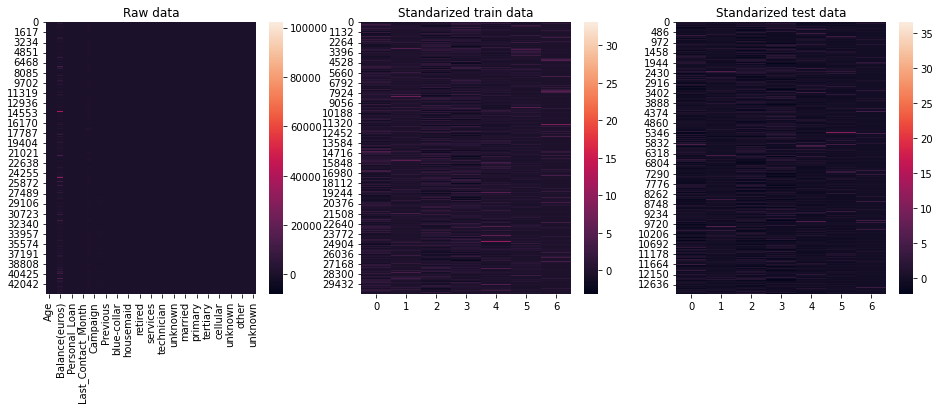

In [40]:
#Se grafica la diferencia entre escalar y no
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtrain_scal, ax = axs[1])
sns.heatmap(xtest_scal, ax = axs[2])
axs[0].set_title('Raw data')
axs[1].set_title('Standarized train data')
axs[2].set_title('Standarized test data')

In [41]:
#Creamos el modelo SVM Regressor 
svc = SVC(probability=True)

In [42]:
# Hyperparametros
parameters = {'kernel':('linear','rbf'),
              'C':[1,5,10],
              'gamma':[0.01,0.1,1 ]}

In [43]:
#Se crea el gridsearch
clf = GridSearchCV(svc, # modelo
                  param_grid = parameters, # Hyperparametros
                  refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                cv = 5, # cv indica la cantidad de folds
                  verbose=2)

In [45]:
#Se entrena
clf.fit(xtrain_scal, ytrain.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  23.5s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  24.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  25.8s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  25.5s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  24.7s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  51.3s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  46.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  46.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  45.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  46.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  23.7s
[CV] END ......................C=1, gamma=0.1, k

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 5, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ('linear', 'rbf')},
             verbose=2)

In [46]:
#Se predice
ypred = clf.predict(xtest_scal)

In [47]:
#Mejor score
clf.best_score_

0.8908525609556538

In [49]:
#Se muestra el accuracy y la matriz de confusion
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8922489499809088


In [103]:
print("Matriz de confusion")
print(confusion_matrix(ytest,ypred))

Matriz de confusion
[[11324   225]
 [ 1186   360]]


In [88]:
#Se calcula AUC
yproba = clf.predict_proba(xtest_scal)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.8164296186886697


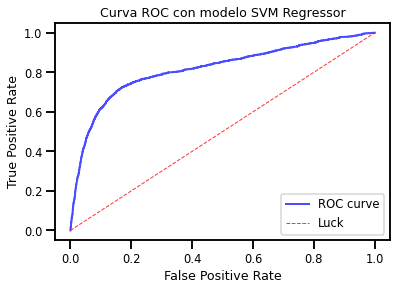

In [101]:
#Se grafica la curva ROC
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('Curva ROC con modelo SVM Regressor')
plt.show()

In [123]:
#Creamos el modelo Logistic Regression y se predice
logisr=LogisticRegression(penalty = 'l1',solver = 'liblinear')
logisr.fit(xtrain_scal,ytrain.ravel())
logispred=logisr.predict(xtest_scal)
print("Matriz de confusion")
print(confusion_matrix(ytest,logispred))
logisscore= accuracy_score(ytest,logispred)
print("Accuracy: ",logisscore)

Matriz de confusion
[[11419   130]
 [ 1320   226]]
Accuracy:  0.8892707140129821


In [84]:
#Se calcula AUC
yproba3 = logisr.predict_proba(xtest_scal)
fpr3, tpr3, thresholds = roc_curve(ytest.astype('int'), yproba3[:,1], drop_intermediate = False)
auc3 = metrics.auc(fpr3, tpr3)
print("El AUC es = " + str(auc3))

El AUC es = 0.8016996481721338


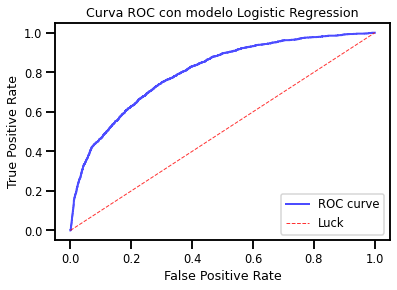

In [121]:
#Se grafica la curva ROC
plt.plot(fpr3, tpr3, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('Curva ROC con modelo Logistic Regression')
plt.show()

In [50]:
#Se extrane 7 componentes con PCA
n_comps = 7
#Se definimos PCA
pca = PCA(n_components= n_comps)
# Se entrena el modelo
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal))
xpcate = pd.DataFrame(pca.fit_transform(xtest_scal))
#Se obtenienen los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [51]:
#Se observa Explainded Variance
pca.explained_variance_

array([1.30742127, 1.16401111, 1.00291054, 0.93232267, 0.9057894 ,
       0.874211  , 0.81386861])

In [52]:
pca.explained_variance_ratio_

array([0.1867602 , 0.1662746 , 0.14326199, 0.13317878, 0.1293886 ,
       0.12487775, 0.11625807])

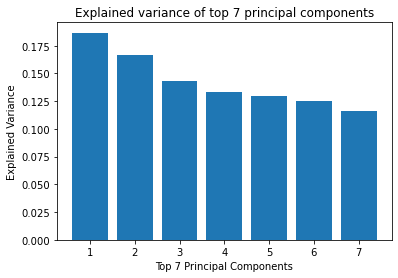

In [55]:
#Se grafica el top 7
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explainded Variance del top' + str(n_comps) + ' de los componentes principales')
plt.xlabel('Top ' +str(n_comps) + ' Componentes principales')
plt.ylabel('Explainded Variance')
plt.show()

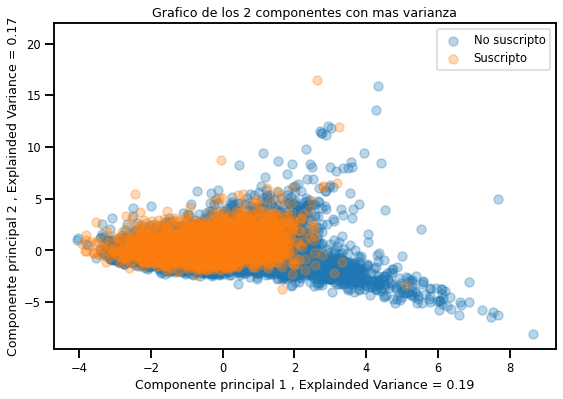

In [124]:
#Se grafica lss 2 componentes con mas varianza
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[(ytrain == 0).ravel(),0],xpca.loc[(ytrain == 0).ravel(),1], alpha = 0.3, label = 'No suscripto')
plt.scatter(xpca.loc[(ytrain == 1).ravel(),0],xpca.loc[(ytrain == 1).ravel(),1], alpha = 0.3, label = 'Suscripto')
plt.xlabel('Componente principal 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Componente principal 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Grafico de los 2 componentes con mas varianza')
plt.legend(loc='upper right')
plt.show()

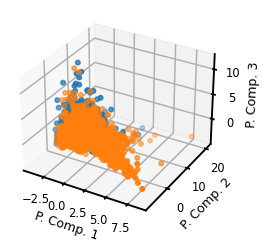

In [109]:
#Se visualiza en 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpca.iloc[(ytrain == 0).ravel(),0], xpca.iloc[(ytrain == 0).ravel(),1], xpca.iloc[(ytrain == 0).ravel(),2])
ax.scatter(xpca.iloc[(ytrain == 1).ravel(),0], xpca.iloc[(ytrain == 1).ravel(),1], xpca.iloc[(ytrain == 1).ravel(),2])
ax.set_xlabel('P. Comp. 1')
ax.set_ylabel('P. Comp. 2')
ax.set_zlabel('P. Comp. 3')
plt.show()

In [59]:
#Creamos el modelo SVM Regressor con PCA
svc1 = SVC(probability=True)

In [60]:
# Hyperparametros
parameters1 = {'kernel':('linear','rbf'),
              'C':[1,5,10],
              'gamma':[0.01,0.1,1 ]}

In [61]:
#Se crea el gridsearch
clf1 = GridSearchCV(svc1, # modelo
                  param_grid = parameters1, # Hyperparametros
                  refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                cv = 5, # cv indica la cantidad de folds
                  verbose=2)

In [62]:
#Se entrena
clf1.fit(xpca, ytrain.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  23.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  24.5s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  23.6s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  23.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  23.7s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  47.7s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  45.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  44.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  45.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  44.5s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  23.2s
[CV] END ......................C=1, gamma=0.1, k

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 5, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ('linear', 'rbf')},
             verbose=2)

In [63]:
#Se predice
ypred1 = clf1.predict(xpcate)

In [64]:
#Se muestra el accuracy y la matriz de confusion
test_acc = accuracy_score(ytest, ypred1)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8833142420771287


In [104]:
print("Matriz de confusion")
print(confusion_matrix(ytest,ypred1))

Matriz de confusion
[[11333   216]
 [ 1312   234]]


In [86]:
#Se calcula AUC
yproba1 = clf1.predict_proba(xpcate)
fpr2, tpr2, thresholds = roc_curve(ytest.astype('int'), yproba1[:,1], drop_intermediate = False)
auc1 = metrics.auc(fpr2, tpr2)
print("El AUC es = " + str(auc1))

El AUC es = 0.7526861473420468


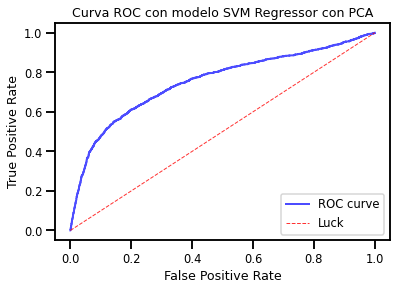

In [131]:
#Se grafica la curva ROC
plt.plot(fpr2, tpr2, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('Curva ROC con modelo SVM Regressor con PCA')
plt.show()

In [125]:
#Creamos el modelo Logistic Regression y se predice dcon PCA
logisr1=LogisticRegression(penalty = 'l1',solver = 'liblinear')
logisr1.fit(xpca,ytrain.ravel())
logispred1=logisr.predict(xpcate)
print("Matriz de confusion")
print(confusion_matrix(ytest,logispred1))
logisscore1= accuracy_score(ytest,logispred1)
print("Accuracy: ",logisscore1)

Matriz de confusion
[[11502    47]
 [ 1527    19]]
Accuracy:  0.8798014509354716


In [94]:
#Se calcula AUC
yproba4 = logisr1.predict_proba(xpcate)
fpr4, tpr4, thresholds = roc_curve(ytest.astype('int'), yproba4[:,1], drop_intermediate = False)
auc4 = metrics.auc(fpr4, tpr4)
print("El AUC es = " + str(auc4))

El AUC es = 0.7732331120327953


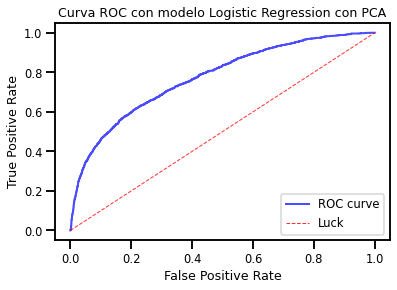

In [133]:
#Se grafica la curva ROC
plt.plot(fpr4, tpr4, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('Curva ROC con modelo Logistic Regression con PCA')
plt.show()

In [132]:
#Se compraran los modelos
print('-----------------------------------------------------')
print('-------------------Modelo SVM------------------------')
print('-----------------------------------------------------')
print(classification_report(ytest, ypred))
print('-----------------------------------------------------')
print('------------------Modelo SVM con PCA-----------------')
print('-----------------------------------------------------')
print(classification_report(ytest, ypred1))
print('-----------------------------------------------------')
print('-------------Modelo Logistic Regression--------------')
print('-----------------------------------------------------')
print(classification_report(ytest, logispred))
print('-----------------------------------------------------')
print('---------Modelo Logistic regression con PCA----------')
print('-----------------------------------------------------')
print(classification_report(ytest, logispred1))

-----------------------------------------------------
-------------------Modelo SVM------------------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11549
           1       0.62      0.23      0.34      1546

    accuracy                           0.89     13095
   macro avg       0.76      0.61      0.64     13095
weighted avg       0.87      0.89      0.87     13095

-----------------------------------------------------
------------------Modelo SVM con PCA-----------------
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11549
           1       0.52      0.15      0.23      1546

    accuracy                           0.88     13095
   macro avg       0.71      0.57      0.59     13095
weighted avg       0.85      0.88      0.85     13095

----------------------